In [1]:
import sympy as smp
import numpy as np
import scienceplots
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp


def Christoffel(i,j,k):
    s = 0
    for a in range(n):
        s+=1/2*g_inv[a,i]*(smp.diff(g[a,j],coord[k])+smp.diff(g[a,k],coord[j])-smp.diff(g[j,k],coord[a]))
    return s

def Riemann(i,j,k,l):
    p=smp.diff(ch[i,j,l],coord[k])-(smp.diff(ch[i,j,k],coord[l]))
    s=0
    for o in range(n):
        s+=ch[i,o,k]*ch[o,j,l]-(ch[i,o,l]*ch[o,j,k])
    return smp.simplify(p+s)

def Ricci(i,j):
    s=0
    for o in range(n):
        s+=riem[o,i,o,j]
    return smp.simplify(s)

def Einstein(i,j):
    s=-1/2*g[i,j]*er+ricci[i,j]
    return smp.simplify(s)

In [2]:
coord = smp.symbols('t r theta phi')
rs, C = smp.symbols('r_s, c')

n = len(coord)

g= smp.Matrix([[0 for i in range(n)] for i in range(n)])
ch=  smp.MutableDenseNDimArray([[[0 for i in range(n)] for i in range(n)] for i in range(n)])
riem = smp.MutableDenseNDimArray([[[[0 for i in range(n)] for i in range(n)] for i in range(n)]for i in range(n)])
ricci = smp.Matrix([[0 for i in range(n)] for i in range(n)])
einstein = smp.Matrix([[0 for i in range(n)] for i in range(n)])

g[0,0]=-(1-rs/coord[1])*C**2
g[1,1]=1/(1-rs/coord[1])
g[2,2]=coord[1]**2
g[3,3]=coord[1]**2*smp.sin(coord[2])**2

g_inv = smp.simplify(g.inv())


gcovariante = smp.symbols(fr'g_alpha_beta')
gcontravariante = smp.symbols(fr'g^alpha^beta')

display(smp.Eq(gcovariante,g,evaluate=False))
display(smp.Eq(gcontravariante,g_inv,evaluate=False))

Eq(g_alpha_beta, Matrix([
[c**2*(-1 + r_s/r),             0,    0,                  0],
[                0, 1/(1 - r_s/r),    0,                  0],
[                0,             0, r**2,                  0],
[                0,             0,    0, r**2*sin(theta)**2]]))

Eq(g^alpha^beta, Matrix([
[-r/(c**2*(r - r_s)),           0,       0,                      0],
[                  0, (r - r_s)/r,       0,                      0],
[                  0,           0, r**(-2),                      0],
[                  0,           0,       0, 1/(r**2*sin(theta)**2)]]))

In [3]:
#Simbolos de Christoffel
for a in range(n):
    for b in range(n):
        for c in range(n):
            ch[a,b,c]=Christoffel(a, b, c)
            if ch[a, b, c] != 0:
                gamma = smp.Symbol(fr'\Gamma_{coord[b]}_{coord[c]}^{coord[a]}')
                display(smp.Eq(gamma,ch[a, b, c],evaluate=False))

Eq(\Gamma_t_r^t, 0.5*r_s/(r*(r - r_s)))

Eq(\Gamma_r_t^t, 0.5*r_s/(r*(r - r_s)))

Eq(\Gamma_t_t^r, 0.5*c**2*r_s*(r - r_s)/r**3)

Eq(\Gamma_r_r^r, -0.5*r_s*(r - r_s)/(r**3*(1 - r_s/r)**2))

Eq(\Gamma_theta_theta^r, -1.0*r + 1.0*r_s)

Eq(\Gamma_phi_phi^r, -1.0*(r - r_s)*sin(theta)**2)

Eq(\Gamma_r_theta^theta, 1.0/r)

Eq(\Gamma_theta_r^theta, 1.0/r)

Eq(\Gamma_phi_phi^theta, -1.0*sin(theta)*cos(theta))

Eq(\Gamma_r_phi^phi, 1.0/r)

Eq(\Gamma_theta_phi^phi, 1.0*cos(theta)/sin(theta))

Eq(\Gamma_phi_r^phi, 1.0/r)

Eq(\Gamma_phi_theta^phi, 1.0*cos(theta)/sin(theta))

In [4]:
#Tensor de Riemann
for a in range(n):
    for b in range(n):
        for c in range(n):
            for d in range(n):
                riem[a,b,c,d]=Riemann(a, b, c,d)
                if riem[a, b, c, d] != 0:
                    R = smp.Symbol(fr'R_{coord[b]}_{coord[c]}_{coord[d]}^{coord[a]}')
                    display(smp.Eq(R,riem[a, b, c,d],evaluate=False))

Eq(R_r_t_r^t, 1.0*r_s/(r**2*(r - r_s)))

Eq(R_r_r_t^t, -1.0*r_s/(r**2*(r - r_s)))

Eq(R_theta_t_theta^t, -0.5*r_s/r)

Eq(R_theta_theta_t^t, 0.5*r_s/r)

Eq(R_phi_t_phi^t, -0.5*r_s*sin(theta)**2/r)

Eq(R_phi_phi_t^t, 0.5*r_s*sin(theta)**2/r)

Eq(R_t_t_r^r, 1.0*c**2*r_s*(r - r_s)/r**4)

Eq(R_t_r_t^r, 1.0*c**2*r_s*(-r + r_s)/r**4)

Eq(R_theta_r_theta^r, -0.5*r_s/r)

Eq(R_theta_theta_r^r, 0.5*r_s/r)

Eq(R_phi_r_phi^r, -0.5*r_s*sin(theta)**2/r)

Eq(R_phi_phi_r^r, 0.5*r_s*sin(theta)**2/r)

Eq(R_t_t_theta^theta, 0.5*c**2*r_s*(-r + r_s)/r**4)

Eq(R_t_theta_t^theta, 0.5*c**2*r_s*(r - r_s)/r**4)

Eq(R_r_r_theta^theta, 0.5*r_s/(r**2*(r - r_s)))

Eq(R_r_theta_r^theta, -0.5*r_s/(r**2*(r - r_s)))

Eq(R_phi_theta_phi^theta, 1.0*r_s*sin(theta)**2/r)

Eq(R_phi_phi_theta^theta, -1.0*r_s*sin(theta)**2/r)

Eq(R_t_t_phi^phi, 0.5*c**2*r_s*(-r + r_s)/r**4)

Eq(R_t_phi_t^phi, 0.5*c**2*r_s*(r - r_s)/r**4)

Eq(R_r_r_phi^phi, 0.5*r_s/(r**2*(r - r_s)))

Eq(R_r_phi_r^phi, -0.5*r_s/(r**2*(r - r_s)))

Eq(R_theta_theta_phi^phi, -1.0*r_s/r)

Eq(R_theta_phi_theta^phi, 1.0*r_s/r)

In [5]:
#Escalar de Kretschmann
ek=0
for a in range(n):
    for b in range(n):
        for c in range(n):
            for d in range(n):
                ek+=(g[a,a]*riem[a,b,c,d])*(g_inv[b,b]*g_inv[c,c]*g_inv[d,d]*riem[a,b,c,d])
K=smp.symbols('K')
display(smp.Eq(K,smp.simplify(ek),evaluate=False))

Eq(K, 12.0*r_s**2/r**6)

In [6]:
#Geodésicas
L=smp.symbols('lambda')
for a in range(n):
    w1=0
    w2=0
    w1=smp.diff(coord[a],L,L,evaluate=False)
    for b in range(n):
        for c in range(n):
            w2+=smp.simplify(ch[a,c,b])*smp.diff(coord[c],L,evaluate=False)*smp.diff(coord[b],L,evaluate=False)
    display(coord[a])
    display(smp.Eq(w1+w2,0,evaluate=False))

t

Eq(Derivative(t, (lambda, 2)) + 1.0*r_s*Derivative(r, lambda)*Derivative(t, lambda)/(r*(r - r_s)), 0)

r

Eq(0.5*c**2*r_s*(r - r_s)*Derivative(t, lambda)**2/r**3 + (-1.0*r + 1.0*r_s)*Derivative(theta, lambda)**2 + 1.0*(-r + r_s)*sin(theta)**2*Derivative(phi, lambda)**2 + Derivative(r, (lambda, 2)) - 0.5*r_s*Derivative(r, lambda)**2/(r*(r - r_s)), 0)

theta

Eq(-0.5*sin(2*theta)*Derivative(phi, lambda)**2 + Derivative(theta, (lambda, 2)) + 2.0*Derivative(r, lambda)*Derivative(theta, lambda)/r, 0)

phi

Eq(Derivative(phi, (lambda, 2)) + 2.0*Derivative(phi, lambda)*Derivative(theta, lambda)/tan(theta) + 2.0*Derivative(phi, lambda)*Derivative(r, lambda)/r, 0)

# SOLUCIONES NUMÉRICAS PARA GEODÉSICAS DE SCHWARZSCHILD

Como mostró Chandrasekhar [1], el Lagrangiano para el espacio-tiempo de Schwarzschild se expresa como:
$$
\begin{align}
\mathcal{L} &= \frac{1}{2} \left[ g(r) \left(\frac{dt}{d\lambda}\right)^2 - \frac{1}{g(r)}\left(\frac{dr}{d\lambda}\right)^2 - r^2 \left(\frac{d\theta}{d\lambda}\right)^2 - r^2 \sin^2\theta \, \left(\frac{d\phi}{d\lambda}\right)^2 \right],\tag{1}
\end{align}
$$
donde $g(r)=\left( 1 - \frac{2M}{r} \right)$. Los momentos canónicos correspondientes se obtienen a partir de la definición estándar:
$$
\begin{equation}
\begin{aligned}
p_t = \frac{\partial \mathcal{L}}{\partial \left( \frac{dt}{d\lambda} \right)} = g(r) \frac{dt}{d\lambda}, \quad
p_r = -\frac{\partial \mathcal{L}}{\partial \left( \frac{dr}{d\lambda} \right)} = g(r)^{-1} \frac{dr}{d\lambda}, \\
p_\theta = -\frac{\partial \mathcal{L}}{\partial \left( \frac{d\theta}{d\lambda} \right)} = r^2 \frac{d\theta}{d\lambda}, \quad
p_\phi = -\frac{\partial \mathcal{L}}{\partial \left( \frac{d\phi}{d\lambda} \right)} = (r^2 \sin^2 \theta) \frac{d\phi}{d\lambda}.
\end{aligned}\tag{2}
\end{equation}
$$
Si fijamos $\theta=\frac{\pi}{2}$, entonces $\frac{d\theta}{d\lambda}=0$, lo que implica que las geodésicas se encuentran en el plano ecuatorial. De la ecuación $(1)$, se observa que tanto $t$ como $\phi$ son coordenadas cíclicas, es decir, no aparecen explícitamente en el Lagrangiano, por lo que sus momentos son constantes de movimiento. Por lo tanto, tenemos:
$$
\begin{align}
p_t=g(r)\frac{dt}{d\lambda}=\text{constante}=E,\tag{3}\\
p_{\phi}=r^2\frac{d\phi}{d\lambda}=\text{constante}=L,\tag{4}
\end{align}
$$
donde $E$ y $L$, son la energía y el momento angular, respectivamente. Además, sabemos que Lagrangiano satisface $2\mathcal{L}=m$, siendo $m$ la masa de la partícula: $m=1$ para geodésicas tipo tiempo, o $m=0$ para geodésicas nulas. De esta forma, la ecuación $(1)$ puede reescribirse como:

$$
\begin{equation}
2\mathcal{L}=g(r)\left(\frac{E}{g(r)}\right)^2-\frac{1}{g(r)}\left(\frac{dr}{d\lambda}\right)^2-r^2\left(\frac{L}{r^2}\right)^2=m.\tag{5}
\end{equation}
$$
Resolviendo para $\frac{dr}{d\lambda}$, obtenemos:
$$
\begin{equation}
\frac{dr}{d\lambda}=\pm\sqrt{E^2-g(r)\left(\frac{L^2}{r^2}+m\right)}.\tag{6}
\end{equation}
$$

Podemos eliminar el parámetro afín utilizando la ecuación $(3)$ de la siguiente manera:
$$
\begin{align}
\frac{dr}{dt} &= \frac{dr}{d\lambda}\frac{d\lambda}{dt} = -\sqrt{E^2-g(r)\left(\frac{L^2}{r^2}+m\right)}\frac{g(r)}{E},\tag{7}\\
\frac{d\phi}{dt}&=\frac{d\phi}{d\lambda}\frac{d\lambda}{dt}=\frac{L}{r^2}\frac{g(r)}{E}.\tag{8}
\end{align}
$$

Elegimos el signo $(-)$, ya que, físicamente, el signo positivo $(+)$ corresponde a una partícula que se aleja radialmente del centro gravitacional (movimiento hacia el infinito), mientras que el signo negativo $(-)$ indica que la partícula está acercándose al centro gravitacional (movimiento hacia el horizonte de eventos o hacia la singularidad, dependiendo de su posición inicial y energía). Dado que estamos interesados en describir el movimiento de una partícula que se aproxima al centro gravitacional, seleccionamos el signo negativo. Por lo tanto, las ecuaciones diferenciales que se resolverán numéricamente son las ecuaciones $(7)$ y $(8)$.

## Referencias
[1] Subrahmanyan Chandrasekhar, *The Mathematical Theory of Black Holes*, vol. 69, Oxford University Press, 1998.



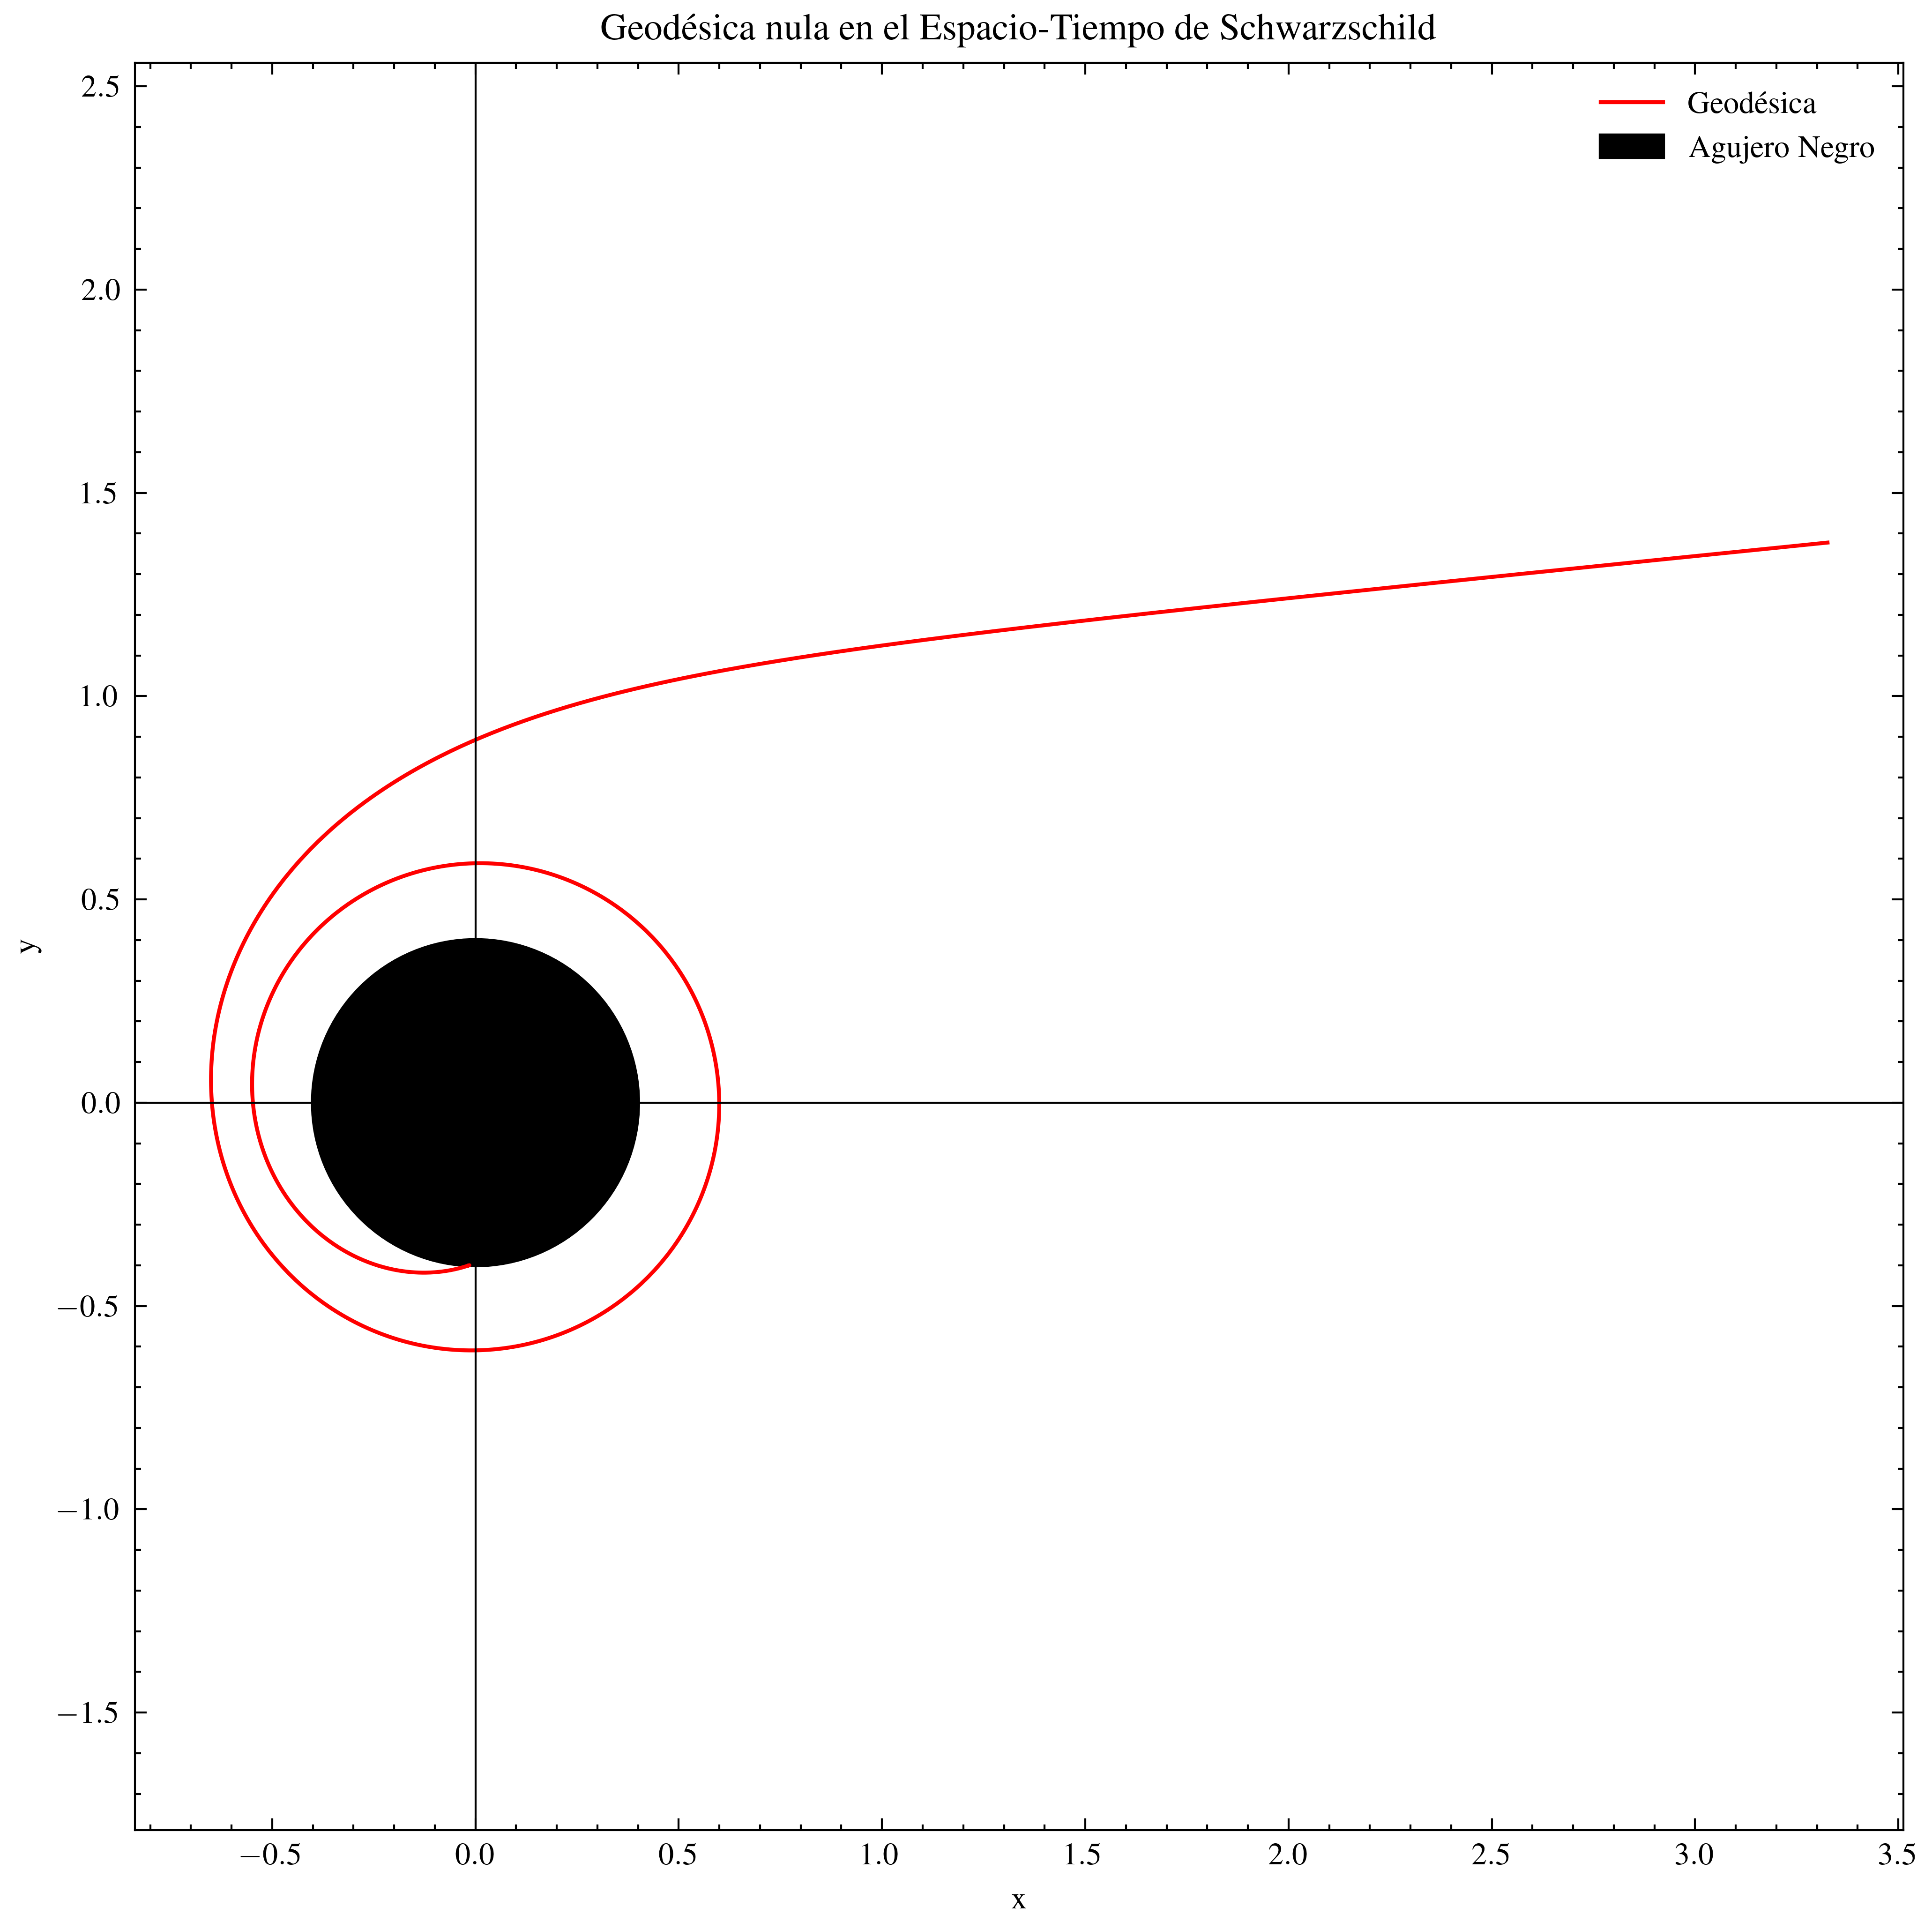

In [7]:
plt.style.use(['science', 'ieee'])

def geodesicas(t, y, L, E, m, r_s):
    r, phi = y
    
    g_r = 1 - r_s / r

    # Verificar que el valor dentro de la raíz cuadrada sea positivo
    raiz = E**2 - g_r * (L**2 / r**2 + m)
    if raiz < 0:
        dr_dt = 0  # Detiene el movimiento radial si el valor es negativo
    else:
        dr_dt = -np.sqrt(raiz) * g_r / E
    
    dphi_dt = L / (r**2 * E) * g_r
    
    return [dr_dt, dphi_dt]    


M = 0.2  # Masa del agujero negro 
L = 0.98719  # Momento angular 
E = 0.95  # Energía 
m = 0  # Masa de la partícula de prueba: 1 "timelike" ó 0 nula
r_s = 2 * M  # Radio de Schwarzschild

# Condiciones iniciales para r(t) y phi(t)
r0 = 18*M  # Condición inicial para r
phi0 = np.pi/8  # Condición inicial para phi en radianes
CI = [r0, phi0]

# Tiempo de integración
intervalo_tiempo = (0, 2000)
tiempos_evaluacion = np.linspace(intervalo_tiempo[0], intervalo_tiempo[1], 100000)

# Resolver las ecuaciones diferenciales
sol = solve_ivp(geodesicas, intervalo_tiempo, CI, args=(L, E, m, r_s), t_eval=tiempos_evaluacion, rtol=1e-9, atol=1e-9)

# Extraer soluciones
r_sol = sol.y[0]
phi_sol = sol.y[1]

# Calcular las trayectorias en coordenadas x e y
x = r_sol * np.cos(phi_sol)
y = r_sol * np.sin(phi_sol)

TP = TP = 'nula' if m == 0 else 'tipo tiempo' if m==1 else '' # Tipo de geodésica

# Graficar las soluciones
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(x, y, label='Geodésica', color='red')
AN = plt.Circle((0, 0), r_s, color='black', fill=True, label='Agujero Negro')
ax.add_artist(AN)

plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Geodésica '+TP+' en el Espacio-Tiempo de Schwarzschild')
plt.legend()

ax.axhline(0, color='k', lw=0.5) 
ax.axvline(0, color='k', lw=0.5)

plt.tight_layout()
plt.show()


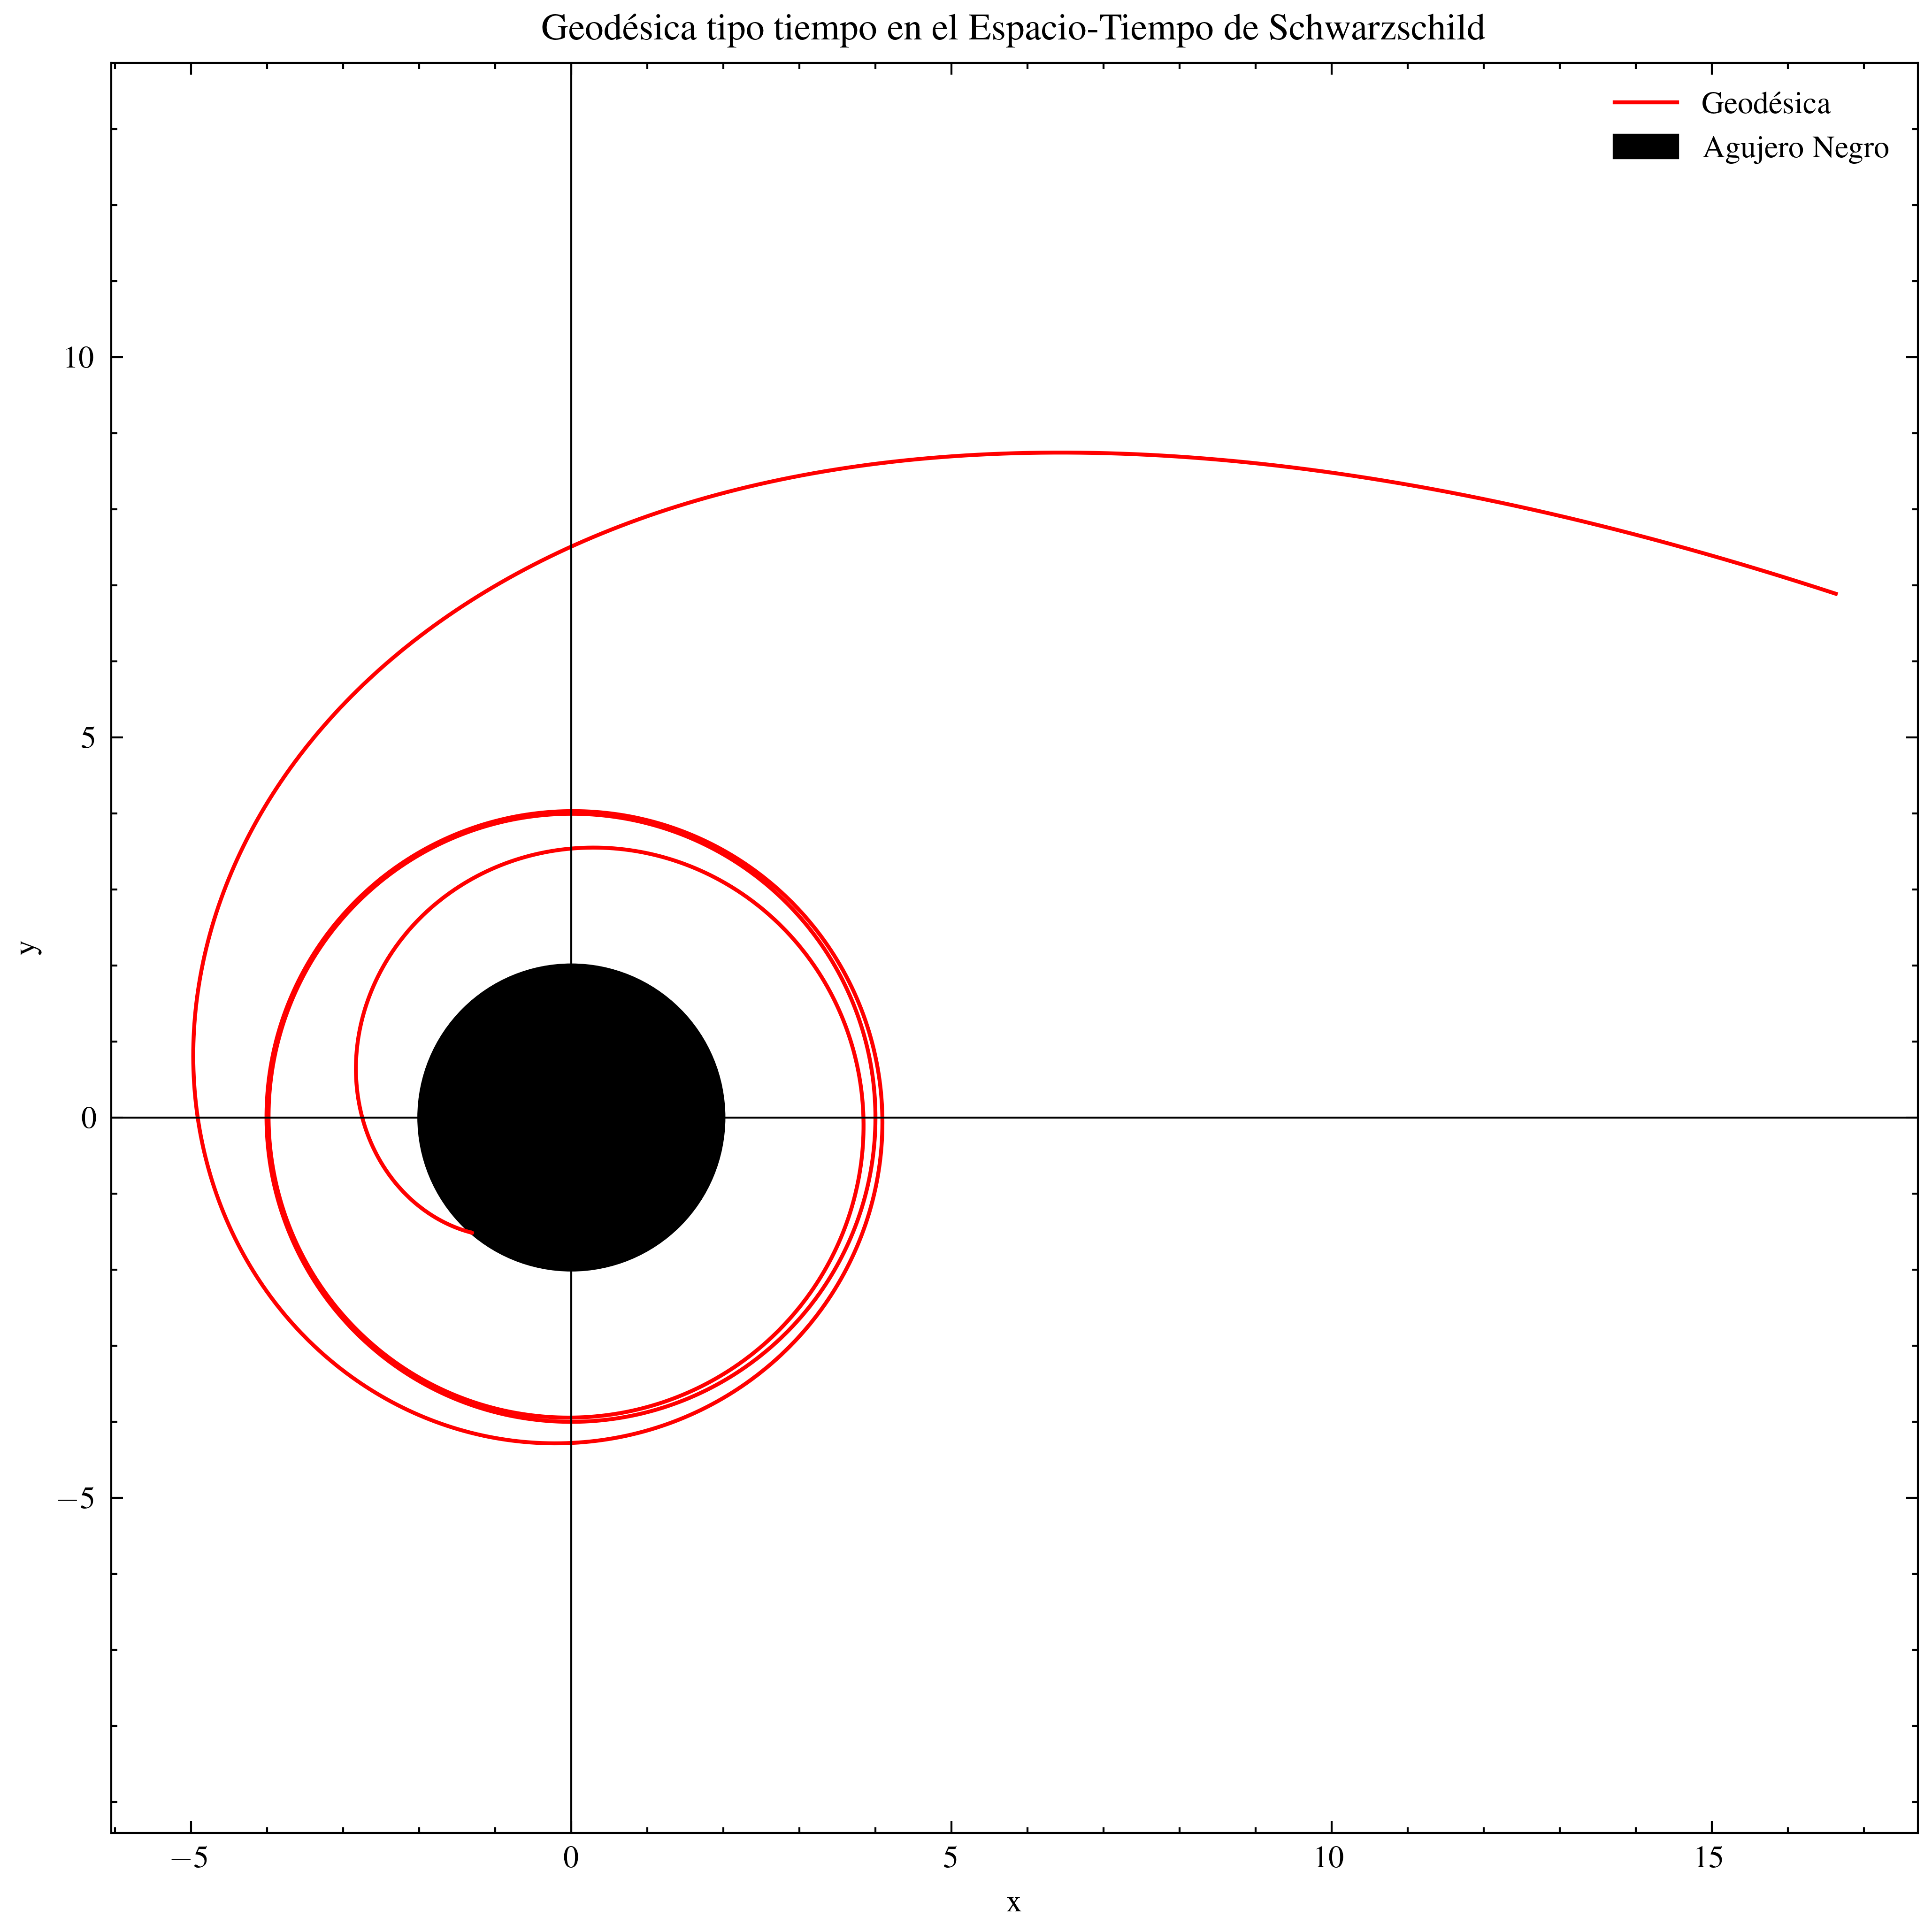

In [8]:
#Geodésica 
M = 1  # Masa del agujero negro 
L = 3.999999  # Momento angular 
E = 1  # Energía 
m = 1  # Masa de la partícula de prueba: 1 "timelike" ó 0 nula
r_s = 2 * M  # Radio de Schwarzschild

# Condiciones iniciales para r(t) y phi(t)
r0 = 18*M  # Condición inicial para r
phi0 = np.pi/8  # Condición inicial para phi en radianes
CI = [r0, phi0]

# Tiempo de integración
intervalo_tiempo = (0, 2000)
tiempos_evaluacion = np.linspace(intervalo_tiempo[0], intervalo_tiempo[1], 100000)

# Resolver las ecuaciones diferenciales
sol = solve_ivp(geodesicas, intervalo_tiempo, CI, args=(L, E, m, r_s), t_eval=tiempos_evaluacion, rtol=1e-9, atol=1e-9)

# Extraer soluciones
r_sol = sol.y[0]
phi_sol = sol.y[1]

# Calcular las trayectorias en coordenadas x e y
x = r_sol * np.cos(phi_sol)
y = r_sol * np.sin(phi_sol)

TP = TP = 'nula' if m == 0 else 'tipo tiempo' if m==1 else '' # Tipo de geodésica

# Graficar las soluciones y el agujero negro
fig, ax = plt.subplots(figsize=(7, 7))
ax.plot(x, y, label='Geodésica', color='red')
AN = plt.Circle((0, 0), r_s, color='black', fill=True, label='Agujero Negro')
ax.add_artist(AN)

plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Geodésica '+TP+' en el Espacio-Tiempo de Schwarzschild')
plt.legend()


ax.axhline(0, color='k', lw=0.5) 
ax.axvline(0, color='k', lw=0.5)

plt.tight_layout()
plt.show()